# シリヤケイカの釣果分析

In [12]:
# モジュールのインポート

import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import datetime
import jpholiday
import sqlite3
import seaborn as sns

# グラフサイズ変更。既定より大きくする

plt.rcParams['figure.figsize'] = [10, 6]

# seaborn グラフにグリッド線を追加

sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})

In [41]:
# シリヤケイカに絞ってSQLite3データベースを検索

conn = sqlite3.connect("../data/fishing_result.db")
sql = '''
select
    r.Date,
    r.Species,
    r.Point,
    r.Count,
    r.WeightMin,
    r.WeightMax,
    c.WaterTemp,
    c.Quantity
from
    fishing_results r,
    fishing_comments c
where
    r.Date = c.Date
    and r.Point = c.Point
    and r.Species = 'シリヤケイカ'
    and r.Date > '2018-01-01'
'''
df=pd.read_sql_query(sql, conn)
df.head()

,Date,Species,Point,Count,WeightMin,WeightMax,WaterTemp,Quantity
0,2018-04-08,シリヤケイカ,honmoku,1,0.4,0.4,15.0,890.0
1,2018-04-10,シリヤケイカ,daikoku,5,0.4,0.5,15.0,120.0
2,2018-04-10,シリヤケイカ,honmoku,3,0.4,0.5,15.0,435.0
3,2018-04-12,シリヤケイカ,daikoku,10,0.4,0.6,16.0,173.0
4,2018-04-13,シリヤケイカ,daikoku,6,0.4,0.7,16.0,NaN


In [42]:
# 土日祝日化判定列を追加

df['Date'] = pd.to_datetime(df.Date)
def isBizDay(Date):
    if Date.weekday() >= 5 or jpholiday.is_holiday(Date):
        return 'Holiday'
    else:
        return 'WeekDay'

df['BizDay'] = df.apply(lambda x: isBizDay(x.Date), axis=1)

In [43]:
# 日付を索引にセットし、年、月カラムを追加

df = df.set_index('Date')
df['Year'] = df.index.year
df['Month'] = df.index.month
df['DayOfYear'] = df.index.dayofyear
df['WeekOfYear'] = df.index.strftime('%U').astype(int) # df3.index.week


<AxesSubplot:xlabel='WeekOfYear', ylabel='Count'>

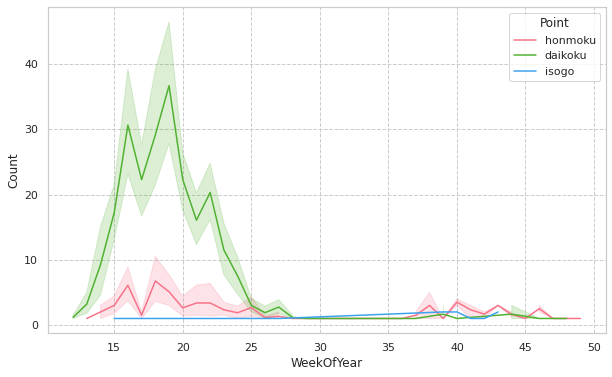

In [44]:
# 各ポイントのシリヤケイカ釣果数の比較
sns.lineplot(data=df, x='WeekOfYear', y='Count', hue='Point',palette="husl")

<AxesSubplot:xlabel='WeekOfYear', ylabel='Count'>

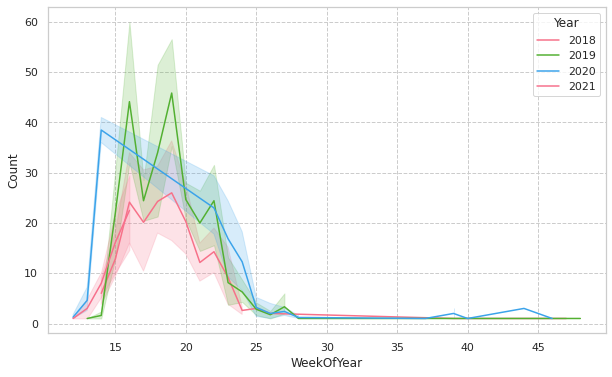

In [45]:
# 大黒海釣り施設に絞って、年度別シリヤケイカ釣果数の比較
sns.lineplot(data=df.query('Point=="daikoku"'), x='WeekOfYear', y='Count', hue='Year',palette="husl")

<AxesSubplot:xlabel='WeekOfYear', ylabel='WeightMax'>

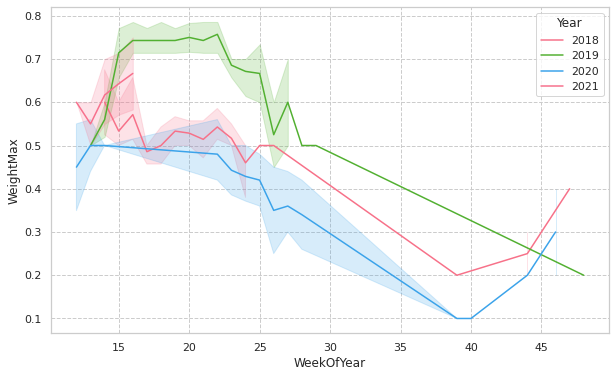

In [61]:
# 大黒海釣り施設のシリヤケイカ釣果kg(最大)の比較
sns.lineplot(data=df.query('Point=="daikoku"'), x='WeekOfYear', y='WeightMax', hue='Year',palette="husl")

<AxesSubplot:xlabel='Month', ylabel='Count'>

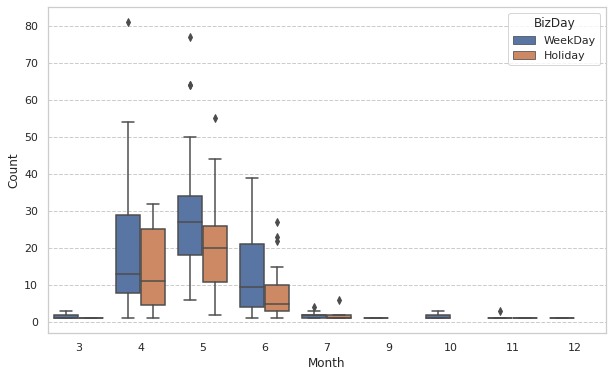

In [48]:
# 大黒海釣り施設の平日、休日の釣果数比較
sns.boxplot(data=df.query('Point=="daikoku"'), x='Month', y='Count', hue='BizDay')

<AxesSubplot:xlabel='Month', ylabel='WeightMax'>

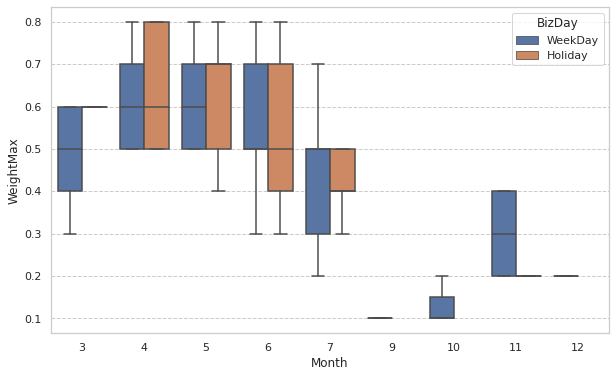

In [59]:
# 大黒海釣り施設の平日、休日の釣果サイズkg比較
sns.boxplot(data=df.query('Point=="daikoku"'), x='Month', y='WeightMax', hue='BizDay')